# 改良版損益分岐点簡易計算機

Enter order quantity:  1000
Enter Minimum Order Quantity (MOQ):  2000
Enter cost of MOQ:  3000
Enter our wholesale price:  500
Enter the desired period to deplete the stock (days):  240


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


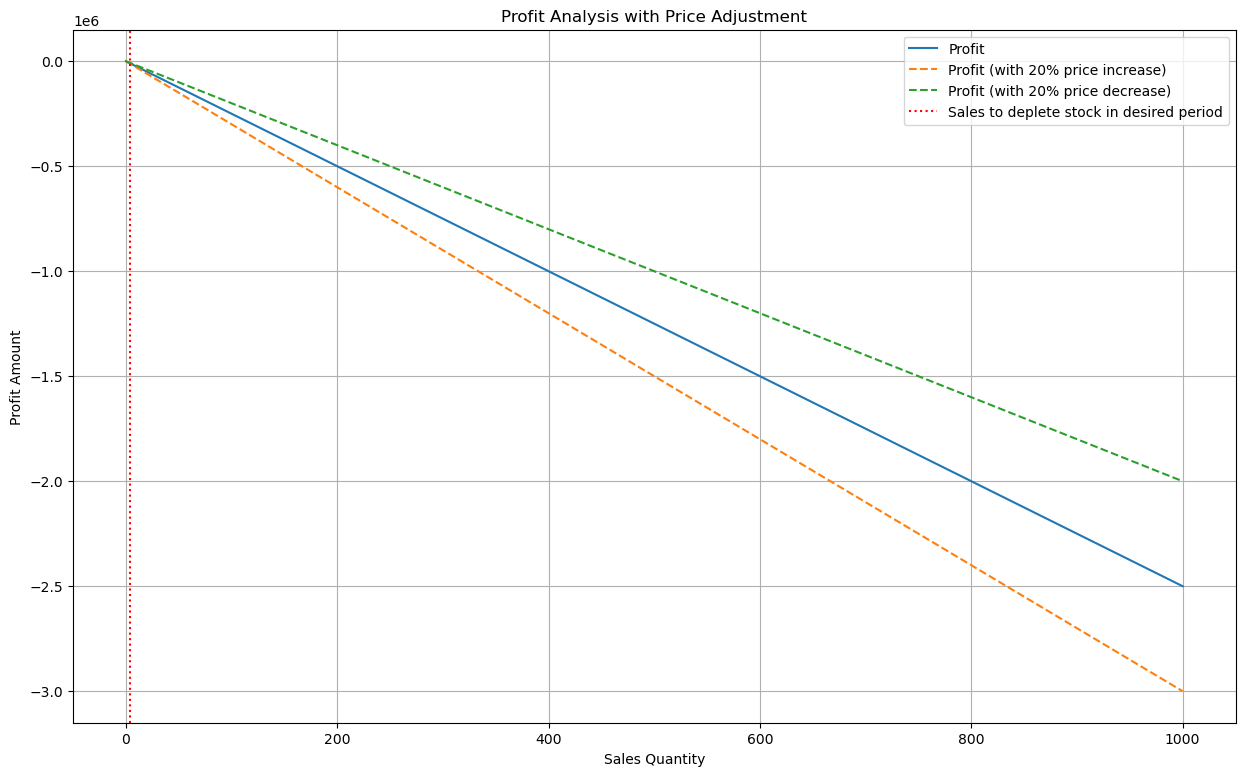

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 入力受取部分
try:
    order_quantity = float(input("Enter order quantity: "))  # 入荷量
    MOQ = float(input("Enter Minimum Order Quantity (MOQ): "))  # MOQ
    cost_of_MOQ = float(input("Enter cost of MOQ: "))  # MOQの原価
    our_wholesale_price = float(input("Enter our wholesale price: "))  # 自社の卸値
    desired_sales_duration = float(input("Enter the desired period to deplete the stock (days): "))  # 在庫をなくすべき期間

except ValueError:
    print("Please enter a valid number.")
    exit()

# パラメータ計算
profit_per_unit = our_wholesale_price - cost_of_MOQ
daily_sales_to_deplete_stock = order_quantity / desired_sales_duration

# 販売数量の範囲を設定
sales = np.linspace(0, order_quantity, 100)

# 総収入、総費用、利益の計算
revenue = our_wholesale_price * sales
total_costs = cost_of_MOQ * sales
profit = revenue - total_costs

# 値付けによる損益の差分計算
profit_20_percent_increase = profit * 1.20
profit_20_percent_decrease = profit * 0.80

# 図を描画
plt.figure(figsize=(15, 9))

plt.plot(sales, profit, label='Profit')
plt.plot(sales, profit_20_percent_increase, label='Profit (with 20% price increase)', linestyle='--')
plt.plot(sales, profit_20_percent_decrease, label='Profit (with 20% price decrease)', linestyle='--')

plt.axvline(x=daily_sales_to_deplete_stock, color='r', linestyle=':', label='Sales to deplete stock in desired period')
plt.legend()
plt.grid(True)
plt.xlabel('Sales Quantity')
plt.ylabel('Profit Amount')
plt.title('Profit Analysis with Price Adjustment')
plt.show()
